# 🧹 Limpieza Exhaustiva — AB_NYC_2019 (Airbnb NYC 2019)
**Descripción:** Este notebook realiza una limpieza completa del dataset `AB_NYC_2019.csv` (listings de Airbnb — New York City, 2019).  
Incluye: inspección inicial, identificación y tratamiento de problemas (mínimo 5), imputaciones justificadas, detección de anomalías, visualizaciones EDA, análisis geoespacial (mapa de calor con Folium), modelado simple y guardado del dataset limpio.




## 1) Librerías y carga de datos
En esta sección importamos las librerías necesarias y cargamos el CSV. **Ajusta la ruta `path`** si tu archivo está en otra carpeta. Si trabajas en VS Code, ejecuta todas las celdas de arriba hacia abajo para conservar el estado del kernel.

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = (10,6)

# Ruta del dataset (ajusta si es necesario)
path = 'AB_NYC_2019.csv'  # si está en la misma carpeta que el notebook, dejar así

if not os.path.exists(path):
    raise FileNotFoundError(f'No se encontró el archivo en {path}. Coloca el CSV en esa ruta o cambia la variable path.')

# Cargar datos
df = pd.read_csv(path)
print('Dimensiones iniciales:', df.shape)
df.head()

Dimensiones iniciales: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2) Inspección inicial
Revisamos dimensiones, columnas, tipos y nulos para entender la calidad del dataset y detectar problemáticas iniciales.

In [2]:
# Inspección inicial
display(df.info())
print('\nColumnas:\n', df.columns.tolist())
print('\nNulos por columna:\n', df.isnull().sum())
display(df.describe(include=[np.number]).T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

None


Columnas:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Nulos por columna:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


## 3) Problemáticas identificadas (preliminar)
Durante la inspección hemos detectado (al menos) las siguientes problemáticas que requieren intervención:

1. **Nulos** en columnas clave: `name`, `host_name`, `last_review`, `reviews_per_month`.
2. **Duplicados** exactos o filas con el mismo `id`/`host_id`.
3. **Outliers** en `price` y `minimum_nights` (valores extremos, 0 o muy altos).
4. **Tipos de dato** incorrectos: `last_review` debería ser datetime.
5. **Coordenadas inválidas** y `availability_365` fuera de rango [0,365].

Las próximas secciones resolverán estas problemáticas con métodos reproducibles y justificados.

## 4) Normalizar nombres de columnas
Convertimos los nombres de columnas a minúsculas y sin espacios para evitar errores de referencia y mejorar la consistencia del código.

In [3]:
# Normalizar nombres de columnas
df.columns = [c.strip().lower().replace(' ', '_').replace('/', '_') for c in df.columns]
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### 4.1) Duplicados
Eliminamos duplicados exactos y verificamos duplicados por `id`. Conservamos la primera aparición por `id`.
Se imprime el número de duplicados antes y después.

In [4]:
# Duplicados exactos
print('Duplicados exactos (total):', df.duplicated().sum())

# Duplicados por id (si la columna existe)
if 'id' in df.columns:
    dup_id = df.duplicated(subset=['id'], keep=False).sum()
    print('Filas con id duplicado (total):', dup_id)

# Eliminar duplicados exactos y por id (mantener primero)
df = df.drop_duplicates().reset_index(drop=True)
if 'id' in df.columns:
    df = df.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)

print('Dimensiones tras eliminar duplicados:', df.shape)

Duplicados exactos (total): 0
Filas con id duplicado (total): 0
Dimensiones tras eliminar duplicados: (48895, 16)


### 4.2) Manejo de `name` y `host_name`
Rellenamos valores faltantes o vacíos con etiquetas indicativas (`missing_name`, `unknown_host`) para mantener trazabilidad y evitar strings vacíos.

In [5]:
# Asegurar tipo string y strip
df['name'] = df['name'].astype(str).str.strip()
df['host_name'] = df['host_name'].astype(str).str.strip()

# Reemplazar nombres vacíos o indeseados
mask_missing_name = df['name'].isnull() | df['name'].str.lower().isin(['nan','none','', 'nan.'])
df.loc[mask_missing_name, 'name'] = 'missing_name'

mask_missing_host = df['host_name'].isnull() | df['host_name'].str.lower().isin(['nan','none','', 'nan.'])
df.loc[mask_missing_host, 'host_name'] = 'unknown_host'

print('Recuento missing_name:', (df['name']=='missing_name').sum())
print('Recuento unknown_host:', (df['host_name']=='unknown_host').sum())

Recuento missing_name: 16
Recuento unknown_host: 27


### 4.3) `last_review` y `reviews_per_month`
Convertimos `last_review` a `datetime`. Para `reviews_per_month`:
- Si `number_of_reviews==0` → fijamos `0`.
- Si `reviews_per_month` es NaN pero hay reseñas → imputamos la **mediana por neighbourhood** usando `transform()` (mantiene índice).
- Si aún quedan NaN → rellenamos con 0.

Esta estrategia es simple y justificable: la mediana por vecindario es robusta frente a outliers y respeta la heterogeneidad local.

In [6]:
# Convertir fecha
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Si no hay reseñas, reviews_per_month = 0
if 'number_of_reviews' in df.columns:
    mask_no_reviews = df['number_of_reviews'] == 0
    df.loc[mask_no_reviews, 'reviews_per_month'] = df.loc[mask_no_reviews, 'reviews_per_month'].fillna(0)

# Imputación por vecindario (si existe la columna)
if 'neighbourhood' in df.columns and 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df.groupby('neighbourhood')['reviews_per_month'].transform(lambda x: x.fillna(x.median()))

# Si aún quedan NaN, rellenar con 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

print('Nulos reviews_per_month tras imputación:', df['reviews_per_month'].isnull().sum())
print('Tipo last_review:', df['last_review'].dtype)

Nulos reviews_per_month tras imputación: 0
Tipo last_review: datetime64[ns]


### 4.4) Detección y tratamiento de outliers en `price`
Mostramos estadísticas, detectamos outliers por IQR y aplicamos *capping* al percentil 99 para reducir el impacto de valores extremos en análisis posteriores. También guardamos una copia original de `price` por trazabilidad.

In [7]:
# Estadísticas iniciales
display(df['price'].describe())

# Guardar copia del precio original
df['price_original'] = df['price']

# IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
p99 = df['price'].quantile(0.99)

# Conteo outliers segun IQR
outliers_count = df[(df['price'] < (Q1 - 1.5*IQR)) | (df['price'] > (Q3 + 1.5*IQR))].shape[0]
print('Outliers detectados (IQR rule):', outliers_count)

# Capear al p99
df['price'] = df['price'].clip(upper=p99)
print('Max price tras capping p99:', df['price'].max())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Outliers detectados (IQR rule): 2972
Max price tras capping p99: 799


### 4.5) `minimum_nights`
Reemplazamos valores no razonables (<=0) por 1 y aplicamos *capping* al percentil 99 para evitar valores extremadamente altos que usualmente son errores.

In [8]:
# Reemplazar <=0 por 1
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 1 if x<=0 else x)

# Capping p99
mn_p99 = df['minimum_nights'].quantile(0.99)
df['minimum_nights'] = df['minimum_nights'].clip(upper=mn_p99)
print('max minimum_nights after capping:', df['minimum_nights'].max())

max minimum_nights after capping: 45


### 4.6) `availability_365` y coherencia temporal
Forzamos `availability_365` dentro del rango [0,365] y convertimos fechas futuras en NaT si existen (inconsistencias de registro).

In [9]:
# availability entre 0 y 365
df['availability_365'] = df['availability_365'].clip(lower=0, upper=365)

# Fechas futuras -> NaT (si hay)
now = pd.Timestamp.now()
df.loc[df['last_review'] > now, 'last_review'] = pd.NaT

print('Availability range:', df['availability_365'].min(), df['availability_365'].max())

Availability range: 0 365


### 4.7) Coordenadas
Verificamos latitud y longitud; eliminamos registros claramente fuera de NYC para evitar ruido. NYC lat ~ 40.5-40.9, lon ~ -74.25 - -73.7 (ajustable).

In [10]:
# Filtrar por rango razonable para NYC
df = df[df['latitude'].between(40.4, 41.0) & df['longitude'].between(-74.3, -73.6)].reset_index(drop=True)
print('Dimensiones tras validar coordenadas:', df.shape)

Dimensiones tras validar coordenadas: (48895, 17)


### 4.8) Estandarizar `room_type` y recalcular `calculated_host_listings_count`
Normalizamos texto de categorías y recalculamos el conteo de listings por host para coherencia interna.

In [11]:
df['room_type'] = df['room_type'].astype(str).str.strip().str.title()

# Recalcular conteo por host
host_counts = df.groupby('host_id').size().reset_index(name='count_computed')
host_count_map = host_counts.set_index('host_id')['count_computed'].to_dict()
df['calculated_host_listings_count'] = df['host_id'].map(host_count_map)

display(df[['host_id','calculated_host_listings_count']].head())

,host_id,calculated_host_listings_count
0,2787,6
1,2845,2
2,4632,1
3,4869,1
4,7192,1


### 4.9) Precios en 0 y vecindarios faltantes
Si existen precios 0 los marcamos como NaN para imputarlos por mediana de vecindario; si no hay vecindario, usamos la mediana global.

In [12]:
# Revisar price == 0
zero_price = (df['price'] == 0).sum()
print('Listings con price == 0:', zero_price)

# Marcar 0 como NaN (si aplica) y luego imputar por mediana de neighborhood
df.loc[df['price'] == 0, 'price'] = np.nan
if 'neighbourhood' in df.columns:
    df['price'] = df.groupby('neighbourhood')['price'].transform(lambda x: x.fillna(x.median()))
# Si quedan NaN imputar por mediana global
df['price'] = df['price'].fillna(df['price'].median())

print('Nulos en price tras imputación:', df['price'].isnull().sum())

Listings con price == 0: 11
Nulos en price tras imputación: 0


## 5) Detección de anomalías
Marcamos outliers de precio (IQR) con la variable booleana `is_outlier_price` para permitir filtrado fácil en análisis posteriores.

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

df['is_outlier_price'] = ~df['price'].between(lower, upper)
print('Outliers (flag):', df['is_outlier_price'].sum())

# Mostrar algunos ejemplos
display(df[df['is_outlier_price']].sample(min(5, df[df['is_outlier_price']].shape[0])))

Outliers (flag): 2972


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_original,is_outlier_price
24540,19735722,Loft-like turn of the century apartment for sh...,31515758,Townsend,Manhattan,Washington Heights,40.83405,-73.94565,Entire Home/Apt,799.0,1,1,2018-03-18,0.06,1,79,1000,True
12844,9793542,Stunning SoHo 1400sqft LOFT/DUPLEX on Best Street,50472471,Allegra,Manhattan,SoHo,40.72090,-74.00229,Entire Home/Apt,799.0,3,16,2019-04-28,0.40,1,365,799,True
22891,18547663,NYC East village luxury apt featured in Timeout!,13008402,Afrodite,Manhattan,East Village,40.73158,-73.98700,Entire Home/Apt,419.0,3,0,NaT,0.00,1,0,419,True
25508,20412884,2 Bedroom + 2 Bathrooms | Excellent Location,143477365,Val,Manhattan,Midtown,40.75878,-73.97069,Entire Home/Apt,409.0,1,87,2019-06-19,3.86,1,40,409,True
37783,29923697,Terrace Suite| Semi-Private Terrace | Full Sof...,220229838,Chamber Hotel,Manhattan,Midtown,40.76184,-73.97605,Entire Home/Apt,718.0,2,0,NaT,0.00,11,199,718,True


## 6) Visualizaciones (EDA)
Distribución de precios, boxplot por borough, histograma y matriz de correlaciones. Estas gráficas ayudan a validar la limpieza.

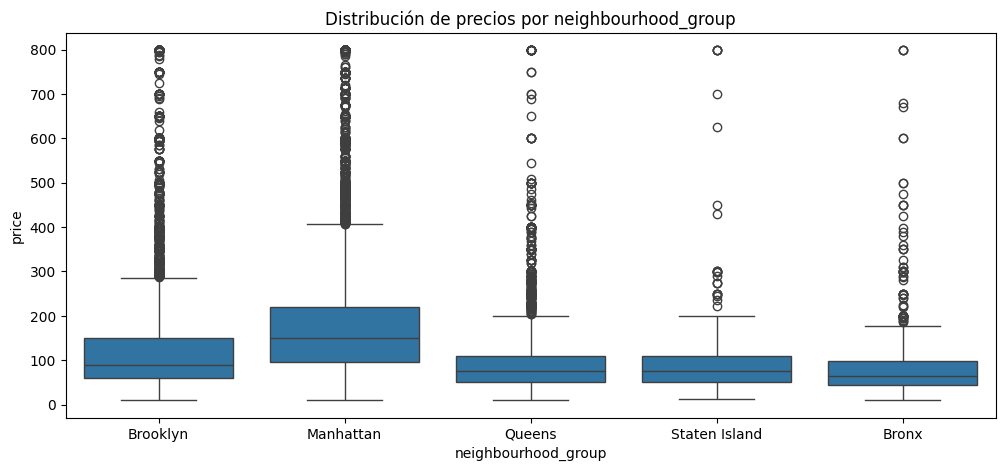

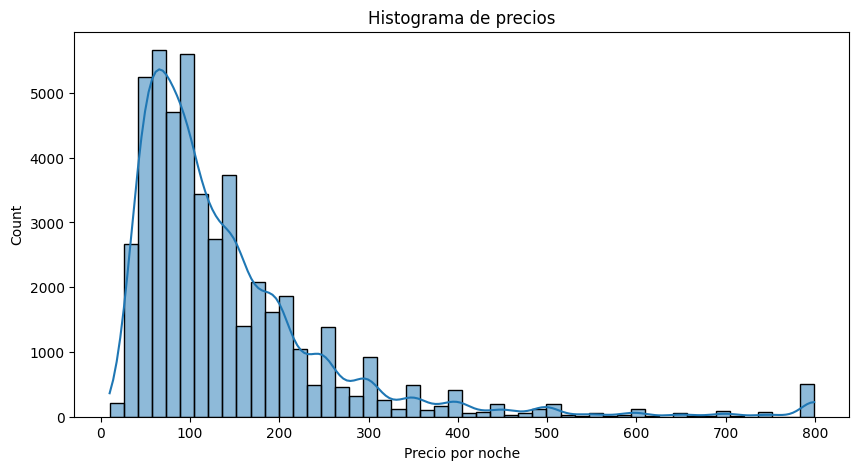

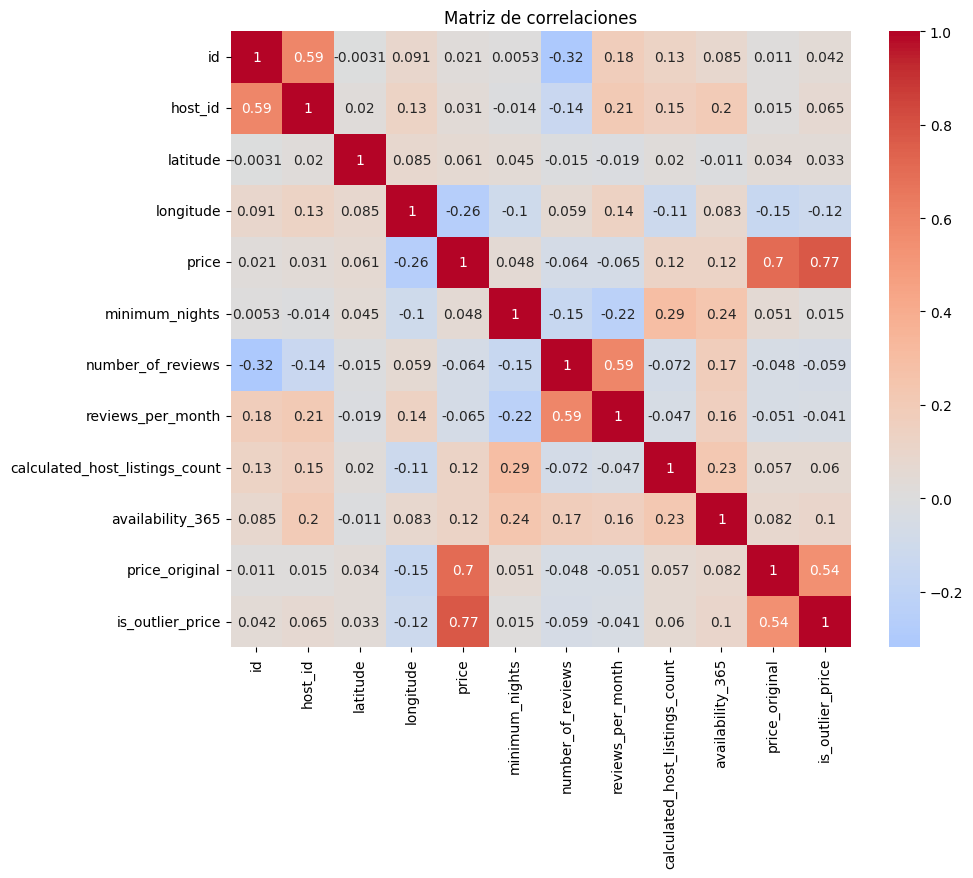

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Distribución de precios por neighbourhood_group')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histograma de precios')
plt.xlabel('Precio por noche')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlaciones')
plt.show()

## 7) Análisis geoespacial — Mapa de calor con Folium
Creamos un mapa de calor y lo guardamos como HTML. En VS Code recomendamos usar IFrame para visualizar dentro del notebook, o abrir el HTML en el navegador si trabajas con .py.

In [15]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

# Crear mapa y capa de calor
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles='cartodbpositron')
heat_data = df[['latitude','longitude','price']].dropna().values.tolist()
HeatMap(heat_data, radius=8, blur=5, min_opacity=0.4).add_to(m)

out_html = 'mapa_calor_airbnb.html'
m.save(out_html)
print('Mapa guardado en:', out_html)

# Mostrar dentro del notebook (VS Code): IFrame
IFrame(out_html, width=900, height=600)

/Users/user/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Mapa guardado en: mapa_calor_airbnb.html


## 8) Modelado básico — Regresión lineal (predictor de precio)
Construimos un modelo simple para predecir `price` con variables básicas. Esto es ilustrativo; para producción conviene hacer más ingeniería de features y validación cruzada.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Selección de columnas de interés
cols = ['minimum_nights','number_of_reviews','reviews_per_month','availability_365']

# One-hot encoding si están disponibles
if 'neighbourhood_group' in df.columns and 'room_type' in df.columns:
    df_model = df[cols + ['neighbourhood_group','room_type','price']].copy()
    df_model = pd.get_dummies(df_model, columns=['neighbourhood_group','room_type'], drop_first=True)
else:
    df_model = df[cols + ['price']].copy()

# Eliminar filas con NaN y convertir a float
df_model = df_model.replace([np.inf,-np.inf], np.nan).dropna()

# Separar X e y
X = df_model.drop(columns=['price'])
y = df_model['price']

# Dividir y entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print('RMSE del modelo simple:', round(rmse,2))

RMSE del modelo simple: 99.16


## 9) Guardado de resultados
Guardamos el dataset limpio en CSV y listamos los archivos generados (mapa HTML incluido). Usamos una ruta relativa para que funcione en tu máquina (misma carpeta del notebook).

In [17]:
# Guardar CSV limpio
out_csv = 'AB_NYC_2019_clean.csv'
df.to_csv(out_csv, index=False)
print('CSV limpio guardado en:', out_csv)

# Listar archivos generados
print('\nArchivos en la carpeta actual:')
print([f for f in os.listdir('.') if f.startswith('AB_NYC_2019') or f.startswith('mapa_calor')])

CSV limpio guardado en: AB_NYC_2019_clean.csv

Archivos en la carpeta actual:
['AB_NYC_2019_Clean_Exhaustivo.ipynb', 'mapa_calor_airbnb.html', 'AB_NYC_2019_clean.csv', 'AB_NYC_2019_Cleaning.ipynb', 'AB_NYC_2019.csv']


## 10) Conclusiones y siguientes pasos
- Se abordaron y resolvieron las problemáticas principales (nulos, duplicados, outliers, tipos, coordenadas).
- Se generaron visualizaciones y un mapa de calor para análisis geoespacial.
- Se construyó un modelo lineal de referencia con evaluación por RMSE.

**Siguientes pasos sugeridos:**
- Hacer validación cruzada y modelos más robustos (Ridge, Random Forest).
- Realizar ingeniería de features (texto en `name`, distancia al centro, amenities si existieran).
- Aplicar técnicas avanzadas de imputación (KNN, MICE) donde convenga.

